# Analytics Module
The Analytics module provides descriptive statistics on content data, evidence data and model evaluations 

In [2]:
# reloads modules automatically before entering the execution of code
%reload_ext autoreload
%autoreload 2

# third parties imports
import numpy as np 
import pandas as pd

# -- add new imports here --
import matplotlib.pyplot as plt
from scipy.sparse import csr_matrix 
import matplotlib.pyplot as plt

# local imports
from constants import Constant as C
from loaders import load_ratings
from loaders import load_items


# 1 - Content analytics
Explore and perform descriptive statistics on content data

In [3]:
# -- load the items and display the Dataframe
load_items()

,title,genres
movieId,,
1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
2,Jumanji (1995),Adventure|Children|Fantasy
3,Grumpier Old Men (1995),Comedy|Romance
4,Waiting to Exhale (1995),Comedy|Drama|Romance
5,Father of the Bride Part II (1995),Comedy
...,...,...
162672,Mohenjo Daro (2016),Adventure|Drama|Romance
163056,Shin Godzilla (2016),Action|Adventure|Fantasy|Sci-Fi
163949,The Beatles: Eight Days a Week - The Touring Y...,Documentary


In [4]:
# -- display relevant informations that can be extracted from the dataset

# Load the Dataframe of 'load_items' in a variable
df_items = load_items()

# Count the number of unique number of 'movieId' 
n_movies = df_items.index.nunique()
#Print the number of unique movies
print(f"Number of movies: {n_movies}")

# Extract the year of the movie in the title and save the first year and the last year available in the Dataframe 
year = df_items[C.LABEL_COL].str.extract(r'\((\d{4})\)')
year = year.astype(float)
min_year = year.min()
max_year = year.max()
#Display the range of year
print(f"Year Range : {int(min_year)} - {int(max_year)}")

# Extract all the differents gender in the Datafram and put it in a variable 
genres = df_items[C.GENRES_COL].str.split('|', expand=True).stack()
uni_genres = genres.unique()
list_genres = ', '.join(uni_genres)
list_genres= list_genres.replace(', (no genres listed)', '')
# Display all the genders
print("List of movie genres : ", list_genres)

Number of movies: 9125
Year Range : 1902 - 2016
List of movie genres :  Adventure, Animation, Children, Comedy, Fantasy, Romance, Drama, Action, Crime, Thriller, Horror, Mystery, Sci-Fi, Documentary, IMAX, War, Musical, Western, Film-Noir


/var/folders/_s/lq545j29523cxhdmvhpkrzh40000gn/T/ipykernel_14222/3200223619.py:17: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  print(f"Year Range : {int(min_year)} - {int(max_year)}")


# 2 - Evidence analytics
Explore and perform descriptive statistics on evidence data

In [5]:
# -- load the ratings and display the Dataframe
load_ratings()


,userId,movieId,rating,timestamp
0,1,31,2.5,1260759144
1,1,1029,3.0,1260759179
2,1,1061,3.0,1260759182
3,1,1129,2.0,1260759185
4,1,1172,4.0,1260759205
...,...,...,...,...
99999,671,6268,2.5,1065579370
100000,671,6269,4.0,1065149201
100001,671,6365,4.0,1070940363
100002,671,6385,2.5,1070979663


In [6]:
# -- display relevant informations that can be extracted from the dataset

# Load the Dataframes of load_items and load_ratings and put in variables
df_ratings = load_ratings()
df_items = load_items()

# a) Count the number of ratings
tot_ratings = df_ratings.shape[0]
# Display the number of ratings
print(f"Number of total ratings : {tot_ratings}")

# b) Count the number of unique users in the Dataframe 
n_users = df_ratings[C.USER_ID_COL].nunique()
# Print the number of users
print(f"Number of unique users : {n_users}")

# c) Count the number of unique movies int the Dataframe
n_movie = df_ratings[C.ITEM_ID_COL].nunique()
# Print the number of unique movies
print(f"Number of unique movies : {n_movie}")

# d) Count the number of occurences for each movie
count_ratings = df_ratings[C.ITEM_ID_COL].value_counts()
# Display the id of the movie that has the maximum occurences of rating
n_max_movie = count_ratings.max()  
print(f"Number of ratings of the most rated movie : {n_max_movie}")

# e) Display the id of the movie that has the minimum occurences of rating
n_min_movie = count_ratings.min()
print(f"Number of ratings of the less rated movie : {n_min_movie}")

# f) Find all the unique scores in the ratings
ratings = df_ratings[C.RATING_COL].unique()
# Print the differents value sorted
sorted_ratings = sorted(ratings)
print(f"Different ratings values sorted : {sorted_ratings}")

# g) Find all the unique movies in each Dataframe and count the number of movies not rated
movies_in_ratings = df_ratings[C.ITEM_ID_COL].unique()
movies_in_movies = df_items.index.unique()
movies_notrated = set(movies_in_movies) - set(movies_in_ratings)
n_movies_notrated = len(movies_notrated)
# Print the number of movies not rated
print(f"Number of movies not rated : {n_movies_notrated}")

Number of total ratings : 100004
Number of unique users : 671
Number of unique movies : 9066
Number of ratings of the most rated movie : 341
Number of ratings of the less rated movie : 1
Different ratings values sorted : [0.5, 1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0, 4.5, 5.0]
Number of movies not rated : 59


# 3 - Long-tail property

movieId
356       341
296       324
318       311
593       304
260       291
         ... 
140753      1
140755      1
140757      1
140759      1
140761      1
Name: count, Length: 9066, dtype: int64
[356, 296, 318, 593, 260] [341, 324, 311, 304, 291]


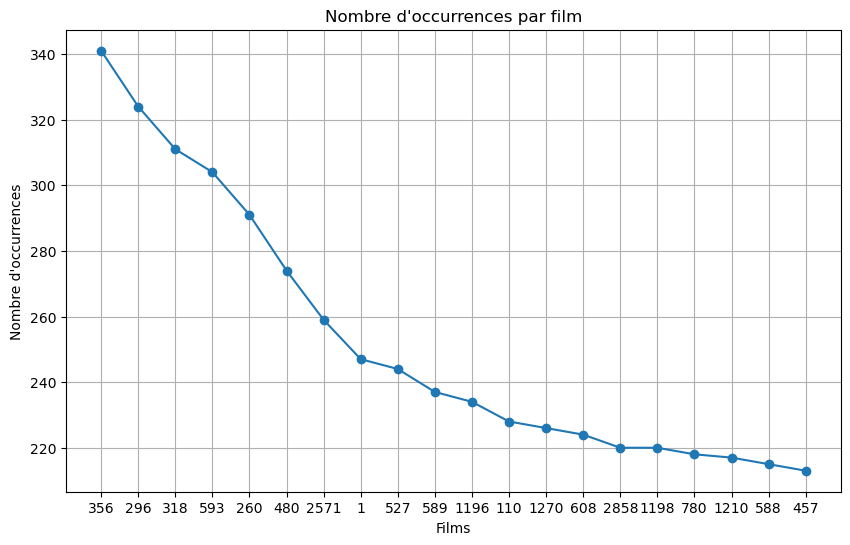

In [7]:

# Load the Dataframe in a variable
df_ratings = load_ratings()
# Extract the number of occurences of movies
movie_counts = df_ratings[C.ITEM_ID_COL].value_counts()
print(movie_counts)
 
# Stock the movies in a list
movies = movie_counts.index.tolist()
# Stock the occurences in another one
counts = movie_counts.tolist()
print (movies[:5],counts[:5])
 
# Create some peers of points 
points = [(x, y) for x, y in zip(movies, counts)]
 
# Sort the different points with the number of occurences (axe y)
points_sorted = sorted(points, key=lambda x: x[1], reverse=True)
 
# Extract sorted coordinates 
x_sorted, y_sorted = zip(*points_sorted)
 
# Limit of movies to display on the axe x 
num_films_to_display = 20
x_sorted = x_sorted[:num_films_to_display]
y_sorted = y_sorted[:num_films_to_display]
 
# Create the graph
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(x_sorted) + 1), y_sorted, marker='o', linestyle='-')
 
# Add the tags for the movies on the axe x
plt.xticks(range(1, len(x_sorted) + 1), x_sorted)
 
# Add title and labels
plt.title('Nombre d\'occurrences par film')
plt.xlabel('Films')
plt.ylabel('Nombre d\'occurrences')
plt.grid(True)
 
# Display the graph
plt.show()

# 4 - Rating Matrix Sparsity

   userId  movieId  rating
0       1       31     2.5
1       1     1029     3.0
2       1     1061     3.0
3       1     1129     2.0
4       1     1172     4.0


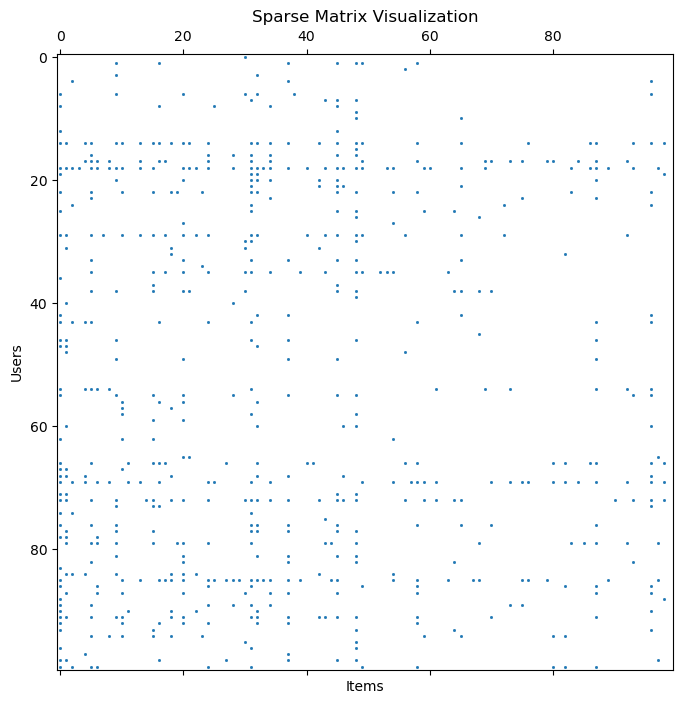

In [8]:
# Select the firsts 3 columns: userID, movieID, rating
df_matrix = df_ratings.iloc[:, :3]
print(df_matrix.head())
 
# Use of a code from this link: https://www.jillcates.com/pydata-workshop/html/tutorial.html
def create_X(df):
    """
    Generates a sparse matrix from ratings dataframe.
 
    Args:
        df: pandas dataframe containing 3 columns (userId, movieId, rating)
 
    Returns:
        X: sparse matrix
        user_mapper: dict that maps user id's to user indices
        user_inv_mapper: dict that maps user indices to user id's
        movie_mapper: dict that maps movie id's to movie indices
        movie_inv_mapper: dict that maps movie indices to movie id's
    """
    M = df['userId'].nunique()
    N = df['movieId'].nunique()
 
    user_mapper = dict(zip(np.unique(df["userId"]), list(range(M))))
    movie_mapper = dict(zip(np.unique(df["movieId"]), list(range(N))))
 
    user_inv_mapper = dict(zip(list(range(M)), np.unique(df["userId"])))
    movie_inv_mapper = dict(zip(list(range(N)), np.unique(df["movieId"])))
 
    user_index = [user_mapper[i] for i in df['userId']]
    item_index = [movie_mapper[i] for i in df['movieId']]
 
    X = csr_matrix((df["rating"], (user_index, item_index)), shape=(M, N))
 
    return X, user_mapper, movie_mapper, user_inv_mapper, movie_inv_mapper
 
X, user_mapper, movie_mapper, user_inv_mapper, movie_inv_mapper = create_X(df_matrix)

# Take the 100 firsts users and 100 firsts movies 
X_subset = X[:100, :100]
plt.figure(figsize=(8, 8))

# Use the library scipy
plt.spy(X_subset, markersize=1)
plt.title('Sparse Matrix Visualization')
plt.xlabel('Items')
plt.ylabel('Users')
plt.show()

In [9]:
# Calculate the matrix sparsity
# Using the code from this link: https://www.jillcates.com/pydata-workshop/html/tutorial.html
n_total = X.shape[0]*X.shape[1]
n_ratings = X.nnz
sparsity = n_ratings/n_total
print(f"Matrix sparsity: {round(sparsity*100,2)}%")

Matrix sparsity: 1.64%
